In [1]:
# k-Nearest Neighbors Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
146852,26,39,9133,1,0,15,4,t,u,n,...,0,0,0,0,0,0,0,0,0,1
125642,4,1202,2074,2,5,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,1
179224,20,719,3788,2,15,6,6,t,w,q,...,0,0,0,0,0,0,0,0,0,1
258628,20,173,2261,1,0,9,3,t,h,q,...,0,0,0,0,0,0,0,0,0,1
80800,23,1263,4542,3,10,16,10,t,i,x,...,1,0,0,0,0,0,0,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])



In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
146852,26,39,9133,1,0,15,4,2,3,0,...,0,0,0,0,0,0,0,0,0,1
125642,4,1202,2074,2,5,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,1
179224,20,719,3788,2,15,6,6,2,4,1,...,0,0,0,0,0,0,0,0,0,1
258628,20,173,2261,1,0,9,3,2,0,1,...,0,0,0,0,0,0,0,0,0,1
80800,23,1263,4542,3,10,16,10,2,1,2,...,1,0,0,0,0,0,0,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,38].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=275)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=275)

In [15]:
y_pred = classifier.predict(X_test)


C:\Users\Brad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.53      0.49      5054
           2       0.38      0.31      0.34      4992
           3       0.40      0.42      0.41      5029

    accuracy                           0.42     15075
   macro avg       0.41      0.42      0.41     15075
weighted avg       0.41      0.42      0.41     15075



In [17]:
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']

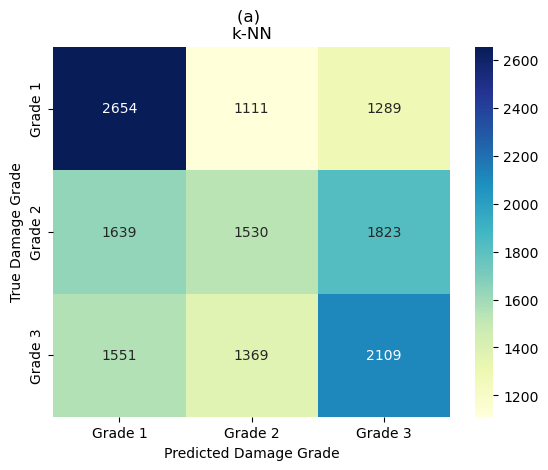

In [18]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("k-NN Prediction Matrix")
plt.title("(a) \nk-NN")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()